<a href="https://colab.research.google.com/github/Maruf520/Artificial-Intelligence-Lab/blob/main/House%20Price%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from numpy import unique

In [53]:
df = pd.read_csv('/content/sample_data/house_price_Dataset.csv')

In [54]:
df.shape

(21613, 21)

In [55]:
df = df.head(1000)

In [56]:
df.shape

(1000, 21)

In [57]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [58]:
for d_col in df.columns:
    print(d_col, ': ', len(unique(df[d_col])))

id :  992
date :  272
price :  591
bedrooms :  8
bathrooms :  19
sqft_living :  321
sqft_lot :  829
floors :  6
waterfront :  2
view :  5
condition :  5
grade :  9
sqft_above :  291
sqft_basement :  140
yr_built :  114
yr_renovated :  25
zipcode :  69
lat :  896
long :  405
sqft_living15 :  267
sqft_lot15 :  799


In [59]:

df = df.dropna() # dropping null entities
df = df.drop(['id', 'date'], axis=1) # dropping unnecessary column `id` and `date`

In [60]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [61]:
X = df.iloc[:,1:]  # independent columns
Y = df.iloc[:,0]   # target column i.e price

In [62]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

[0.04467472 0.05771206 0.08113871 0.07909465 0.02785022 0.00161304
 0.01414488 0.0397073  0.04347665 0.07945327 0.04579165 0.07894744
 0.00832755 0.07063501 0.08604525 0.08052569 0.08394595 0.07691596]


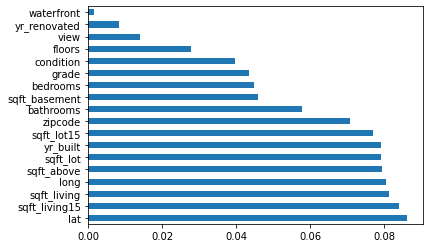

In [63]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X)).plot(kind='barh')
plt.show()

In [64]:
X = X[
[
    'lat', 
    'sqft_living15', 
    'sqft_living', 
    'long',
    'sqft_lot',
    'sqft_above',
    'sqft_lot15',
    'yr_built',
    'zipcode',
    'bathrooms'
]]

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [67]:

from sklearn.linear_model import LinearRegression

In [68]:
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
prediction=reg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


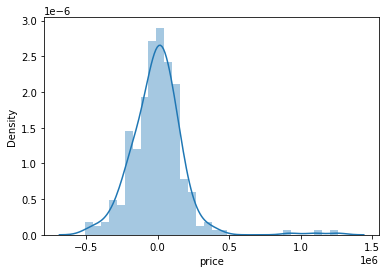

In [70]:
sns.distplot(Y_test-prediction)

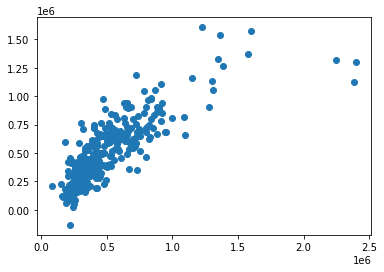

In [71]:
plt.scatter(Y_test, prediction)

In [72]:
compare = pd.DataFrame({'Actual': Y_test, 'Predicted': prediction})

In [73]:

compare.head()

,Actual,Predicted
993,253000.0,223911.956564
859,166600.0,113805.523668
298,404000.0,556711.686903
553,261000.0,170746.741698
672,664000.0,695800.479106


In [74]:
from sklearn.metrics import r2_score

In [75]:
r2_score(Y_test, prediction)

0.6516628503372471

In [76]:
X.columns

Index(['lat', 'sqft_living15', 'sqft_living', 'long', 'sqft_lot', 'sqft_above',
       'sqft_lot15', 'yr_built', 'zipcode', 'bathrooms'],
      dtype='object')